In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import statsmodels.api as sm

In [67]:
df_train = pd.read_csv('./train.csv', index_col='Id')
df_test = pd.read_csv('./test.csv', index_col='Id')
pd.set_option('display.max_columns', None)
df_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [68]:
# Separate target/observation/response variable from training/feature/predictors
y_train=df_train['SalePrice']
x_train=df_train.drop('SalePrice',axis=1)
print(y_train.head(10),'\n',x_train.head(10))

Id
1     208500
2     181500
3     223500
4     140000
5     250000
6     143000
7     307000
8     200000
9     129900
10    118000
Name: SalePrice, dtype: int64 
     MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   
6           50       RL         85.0    14115   Pave   NaN      IR1   
7           20       RL         75.0    10084   Pave   NaN      Reg   
8           60       RL          NaN    10382   Pave   NaN      IR1   
9           50       RM         51.0     6120   Pave   NaN      Reg   
10         190       RL         50.0     7420   Pave  

# (STEP 1.) Plotting sale price and its transformation to reduce skew/kurtosis#

### want to transform y into a normal distribution because: 
### if y is normally distributed, y-yhat = residuals is also normally distributed (where yhat is a constant)

(array([0.e+00, 1.e-06, 2.e-06, 3.e-06, 4.e-06, 5.e-06, 6.e-06, 7.e-06,
        8.e-06, 9.e-06]), <a list of 10 Text yticklabel objects>)

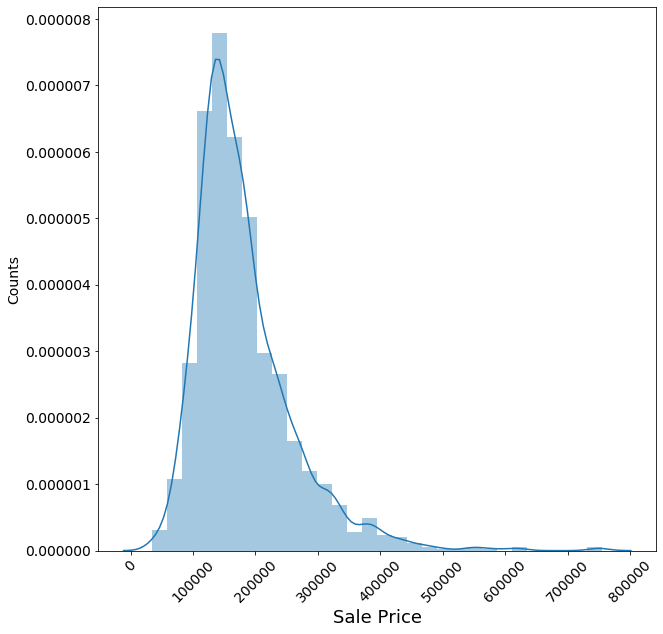

In [69]:
plt.figure(figsize=(10,10))
sns.distplot(y_train,bins=30,kde=True, rug=False)
plt.xlabel('Sale Price', fontsize=18)
plt.xticks(rotation=45,size=14)
plt.ylabel('Counts', fontsize=14)
plt.yticks(size=14)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text yticklabel objects>)

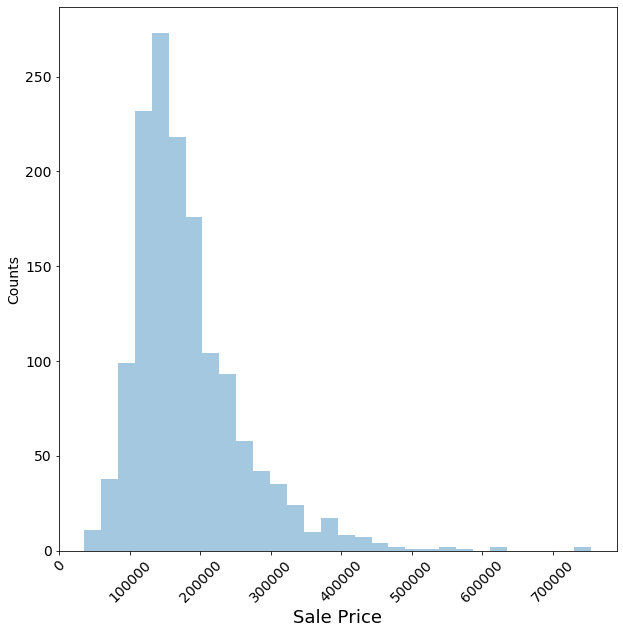

In [70]:
plt.figure(figsize=(10,10))
sns.distplot(y_train,bins=30,kde=False, rug=False)
plt.xlabel('Sale Price', fontsize=18)
plt.xticks(rotation=45,size=14)
plt.ylabel('Counts', fontsize=14)
plt.yticks(size=14)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 <a list of 8 Text yticklabel objects>)

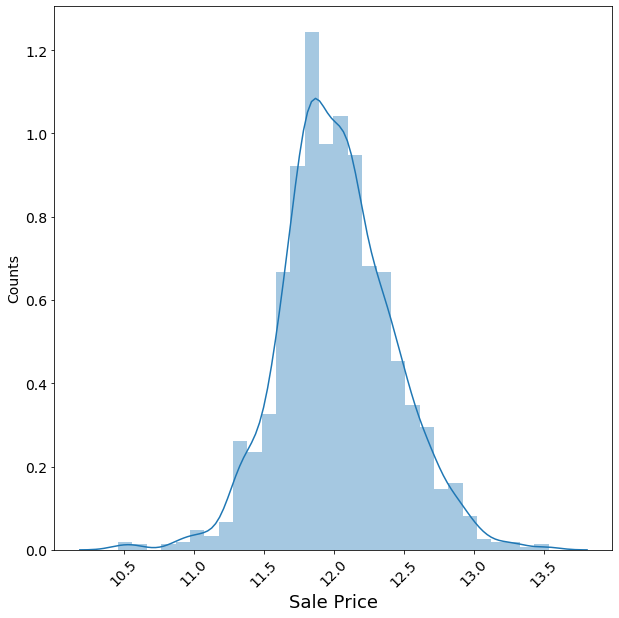

In [71]:
# The dependent variable/response/observation is transformed to become normally distributed because:
plt.figure(figsize=(10,10))
sns.distplot(np.log(y_train),bins=30,kde=True, rug=False)
plt.xlabel('Sale Price', fontsize=18)
plt.xticks(rotation=45,size=14)
plt.ylabel('Counts', fontsize=14)
plt.yticks(size=14)

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text yticklabel objects>)

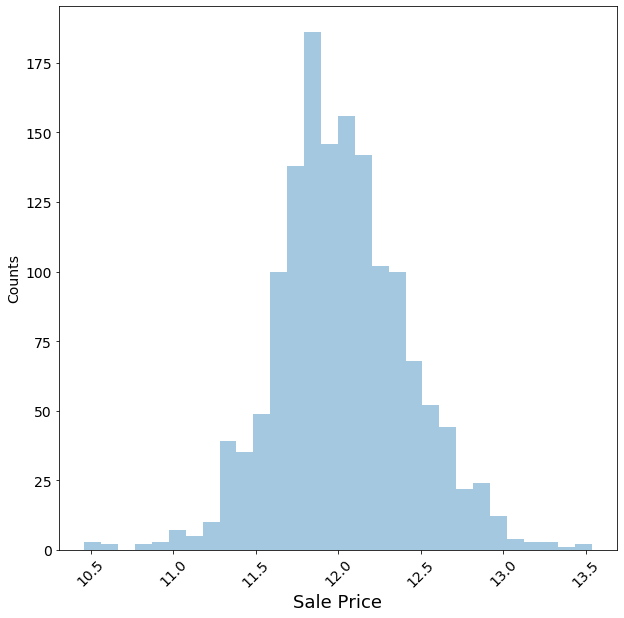

In [72]:
plt.figure(figsize=(10,10))
sns.distplot(np.log(y_train),bins=30,kde=False, rug=False)
plt.xlabel('Sale Price', fontsize=18)
plt.xticks(rotation=45,size=14)
plt.ylabel('Counts', fontsize=14)
plt.yticks(size=14)

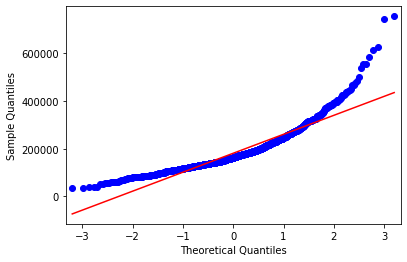

In [73]:
# QQ plot before log transformation: not linear, hence not normal.
fig=sm.qqplot(y_train,line='s')

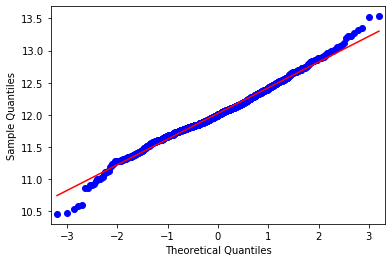

In [74]:
# QQ plot after log transformation: linear looking. Normality is acceptable. 
fig=sm.qqplot(np.log(y_train),line='s')

### Conclusion from transformation of observation/response variable:
### perform log transformation on observable 

In [75]:
y_train=np.log(y_train)

# (STEP 2.) Cateogorizing Nominal, Ordinal categories and continuous quantities#

In [76]:
x_train.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1305,160,RM,32.0,3363,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,117.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,976,976,GasA,Ex,Y,SBrkr,976,732,0,1708,0,0,2,0,3,1,Gd,7,Maj1,0,NaN,Detchd,2004.0,Unf,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
351,120,RL,68.0,7820,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2007,2007,Hip,CompShg,MetalSd,MetalSd,BrkFace,362.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1869,1869,GasA,Ex,Y,SBrkr,1869,0,0,1869,0,0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2007.0,RFn,2,617,TA,TA,Y,210,54,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,Partial
1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
999,30,RM,60.0,9786,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1922,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Fa,No,Unf,0,Unf,0,1007,1007,GasA,Fa,N,SBrkr,1077,0,0,1077,0,0,1,0,3,1,TA,6,Typ,1,Gd,Detchd,1922.0,Unf,1,210,TA,Fa,P,0,100,48,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
1038,60,RL,NaN,9240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,396.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1055,1055,GasA,Ex,Y,SBrkr,1055,1208,0,2263,0,0,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,2001.0,Fin,2,905,TA,TA,Y,0,45,0,0,189,0,NaN,NaN,NaN,0,9,2008,WD,Normal
78,50,RM,50.0,8635,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,5,1948,2001,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,336,GLQ,41,295,672,GasA,TA,Y,SBrkr,1072,213,0,1285,1,0,1,0,2,1,TA,6,Min1,0,NaN,Detchd,1948.0,Unf,1,240,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal
251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,Po,CBlock,TA,TA,No,Unf,0,Unf,0,728,728,GasA,Ex,Y,SBrkr,1306,0,0,1306,0,0,1,0,3,1,Fa,6,Mod,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,263,0,0,0,0,0,NaN,GdWo,Shed,450,5,2010,WD,Normal
561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1957,1996,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,Gd,TA,No,ALQ,1302,Unf,0,90,1392,GasA,TA,Y,SBrkr,1392,0,0,1392,1,0,1,1,3,1,TA,5,Mod,1,Gd,Detchd,1957.0,Unf,2,528,TA,TA,Y,0,0,0,0,95,0,NaN,NaN,NaN,0,5,2010,WD,Normal


In [203]:
x_train.dtypes.value_counts()


object     43
int64      33
float64     3
dtype: int64

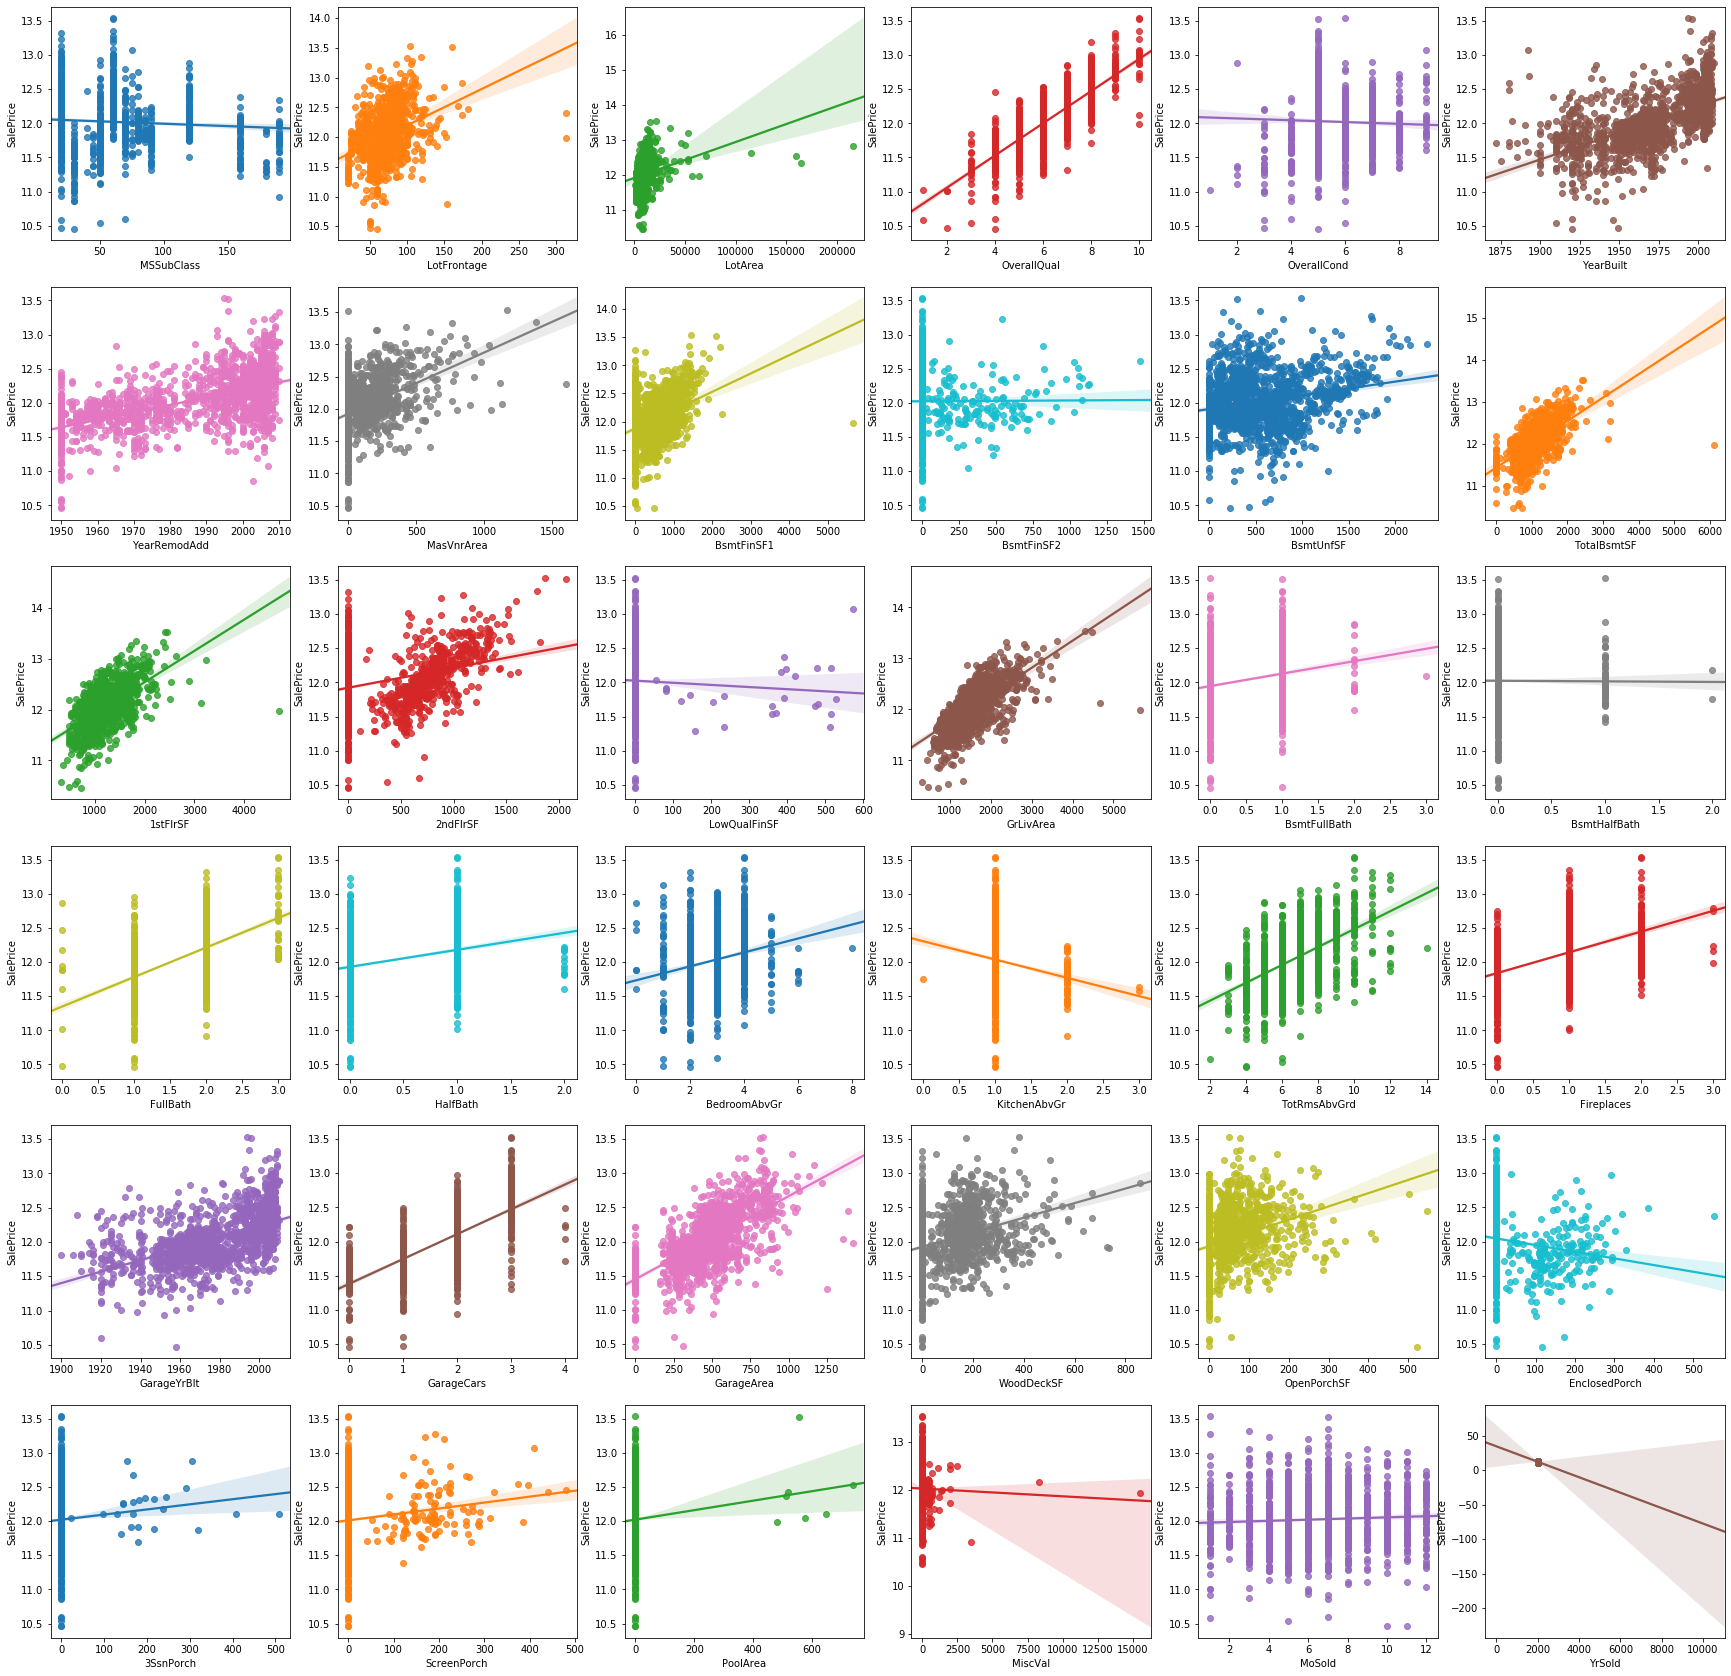

In [204]:
# plotting numerical features
fig,ax=plt.subplots(6,6,figsize=(30,30))
ax=ax.flatten()
for ind,col in enumerate(x_train.loc[:,(x_train.dtypes == 'float64') | (x_train.dtypes =='int64')].columns):
    sns.regplot(x=x_train[col],y=y_train,ax=ax[ind])

In [219]:
# based on above graphs, categorize into the following:
nominal_var=[]

ordinal_var=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',\
             'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',\
             'MoSold','YrSold']

cont_var=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',\
          '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF',\
          'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

var_dict={'nominal_var':nominal_var,'ordinal_var':ordinal_var,'cont_var':cont_var}

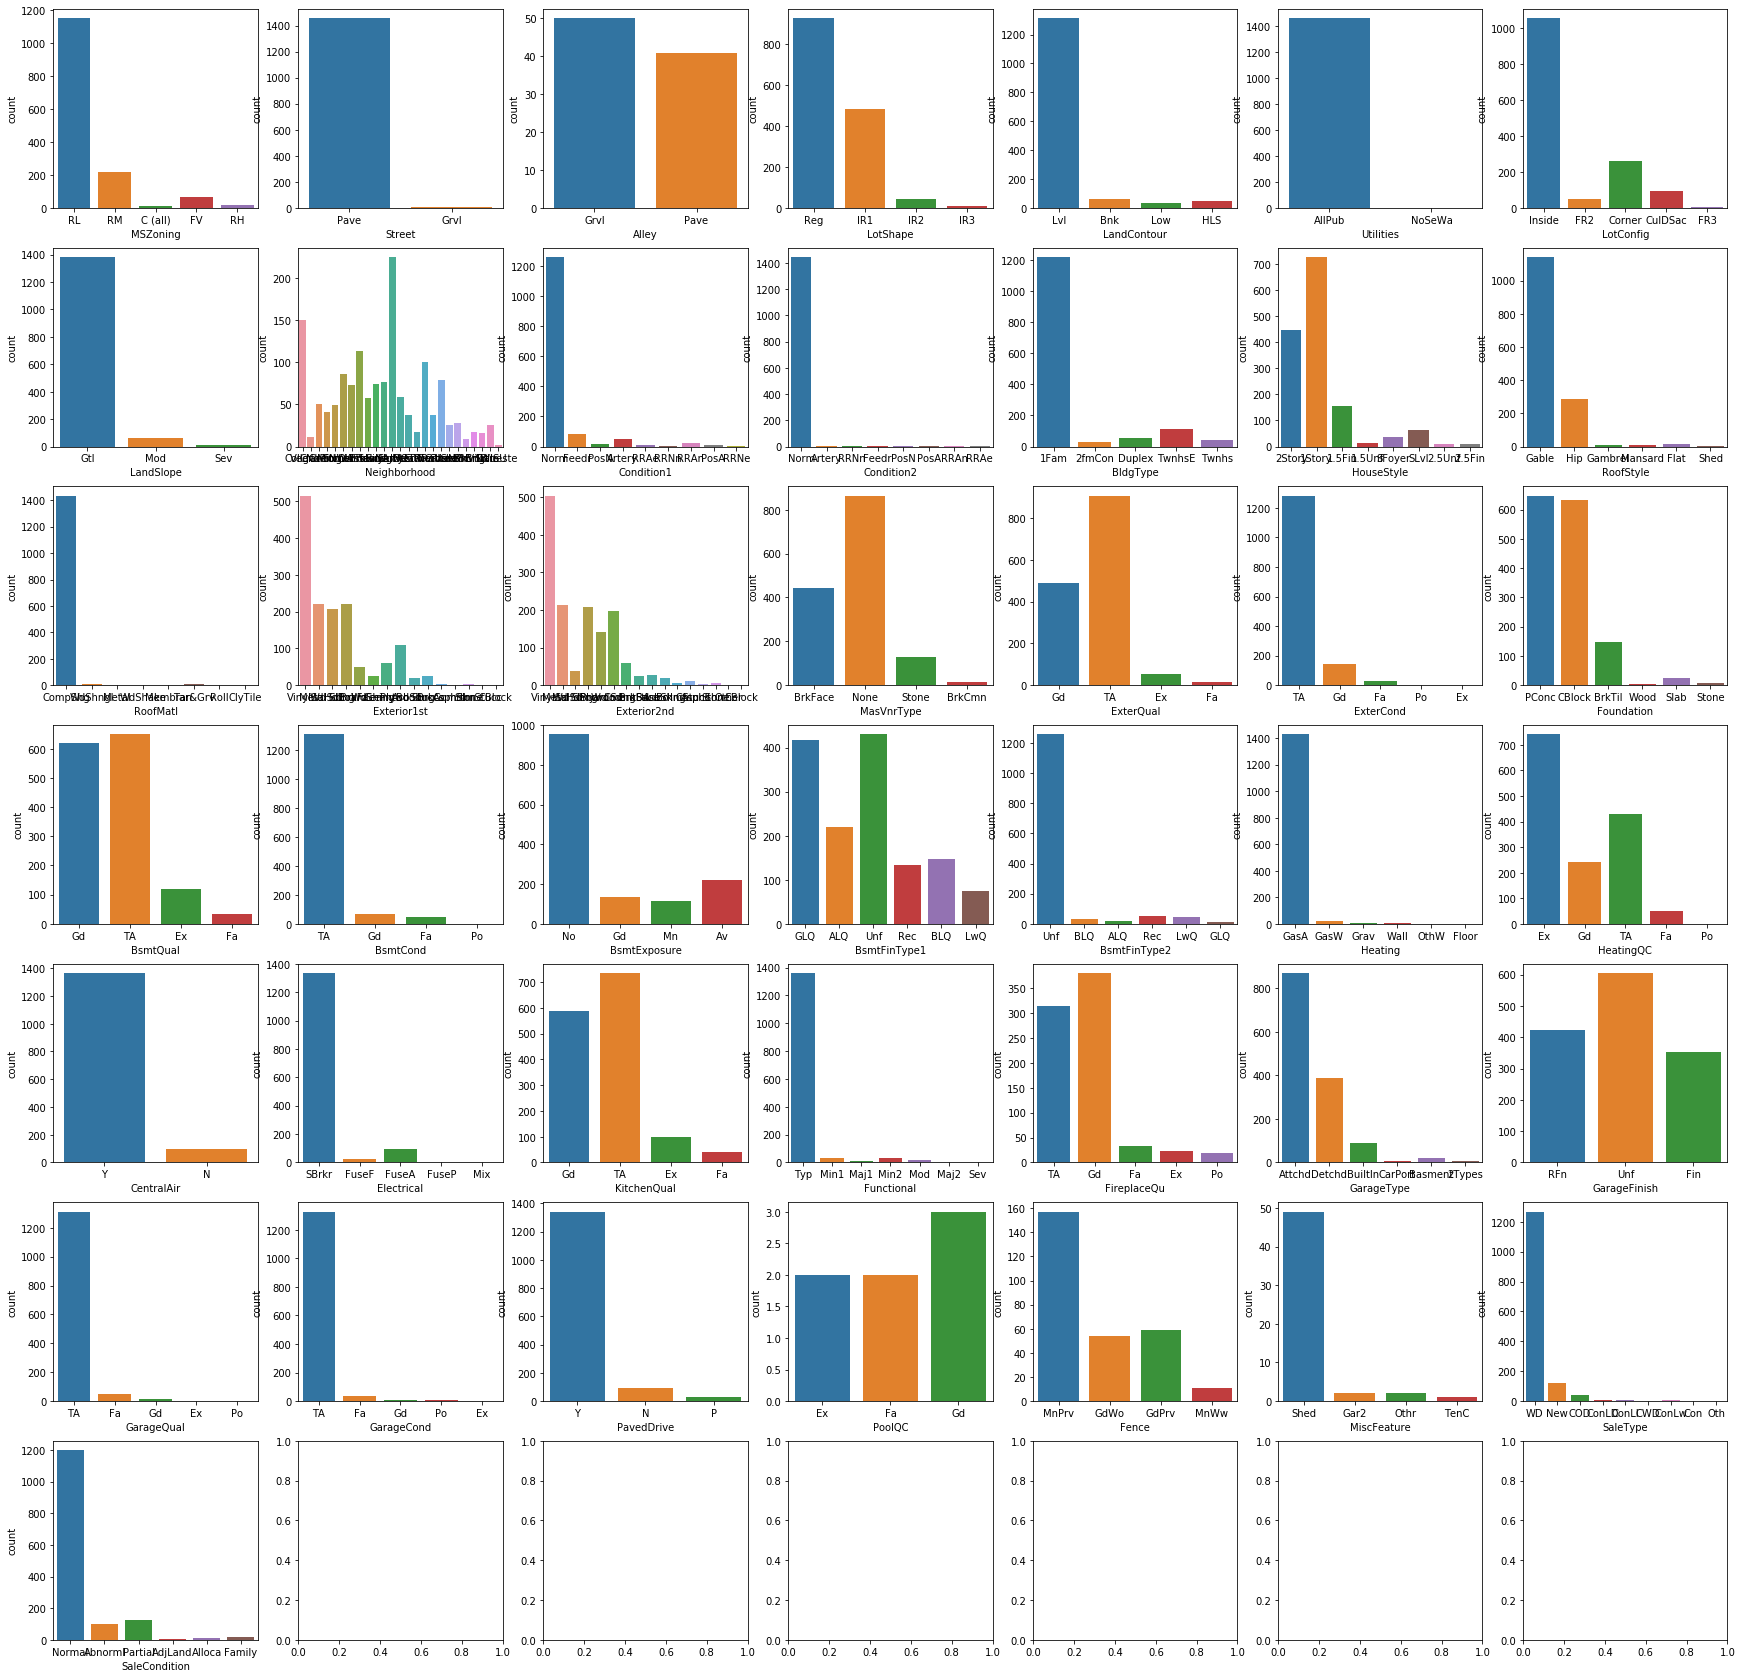

In [206]:
fig,ax=plt.subplots(7,7,figsize=(30,30))
ax=ax.flatten()
for ind, col in enumerate(x_train.loc[:,x_train.dtypes=='object'].columns):
    sns.countplot(x_train[col],ax=ax[ind])

In [220]:
# based on above graphs categorize into the following: 
nominal_var=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',\
             'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',\
             'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',\
             'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',\
             'Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',\
             'GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
ordinal_var=[]
cont_var=[]
var_dict['nominal_var']+=nominal_var

In [223]:
# Check if the column names were written out correctly
nestedlist=[]
for key,val in var_dict.items():
    nestedlist.append(val)
flat_list=[item for sublist in nestedlist for item in sublist]
np.array(flat_list).size
sorted(x_train.columns)==sorted(flat_list)

True

# (STEP 3.) Visualizing missing values #

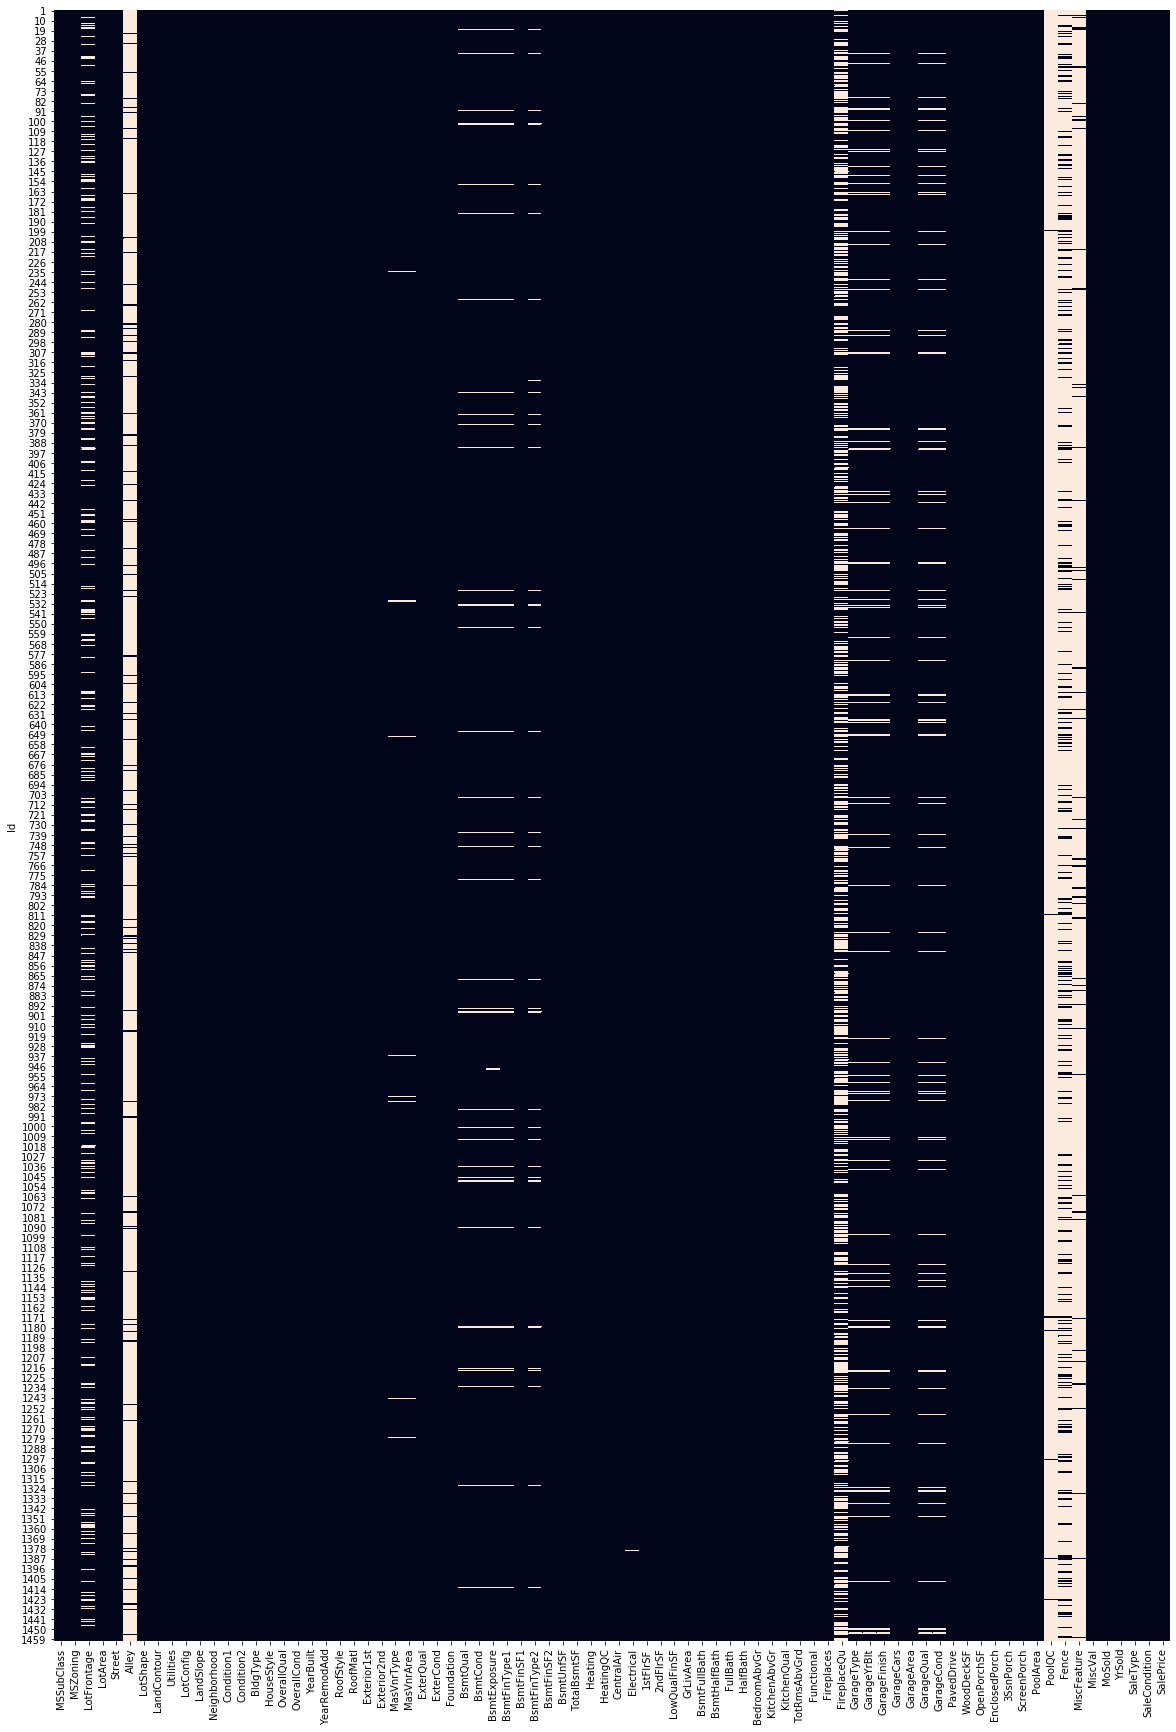

In [10]:
plt.figure(figsize=(20,30))
sns.heatmap(df_train.isnull(), cbar=False)

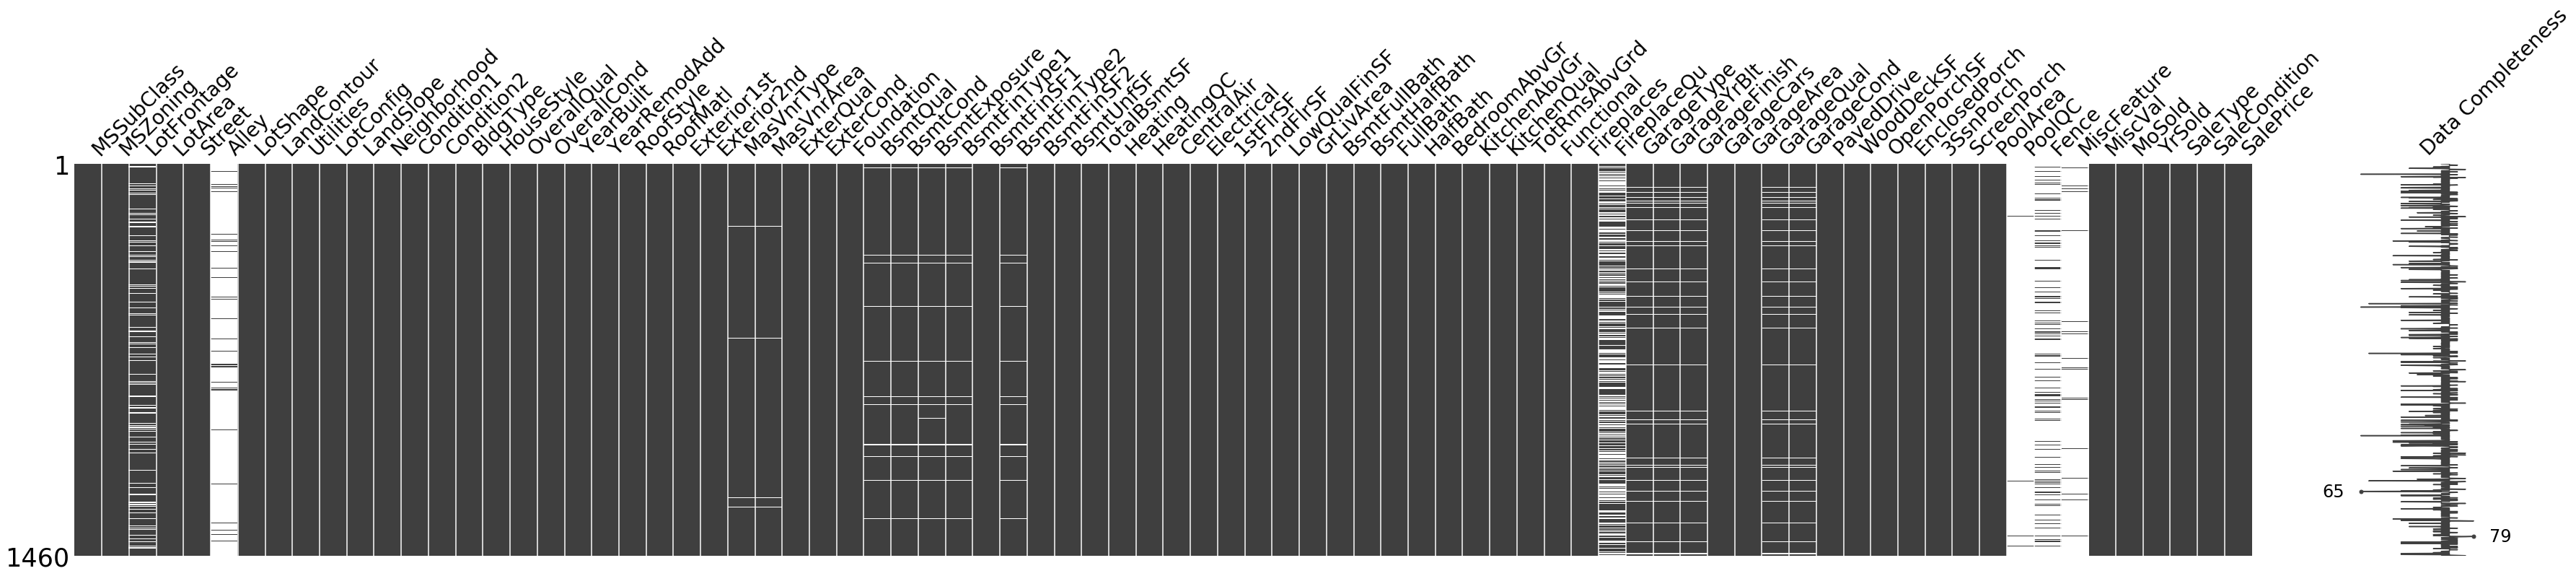

In [11]:
msno.matrix(df_train,figsize=(60, 10),fontsize=28,labels=True)

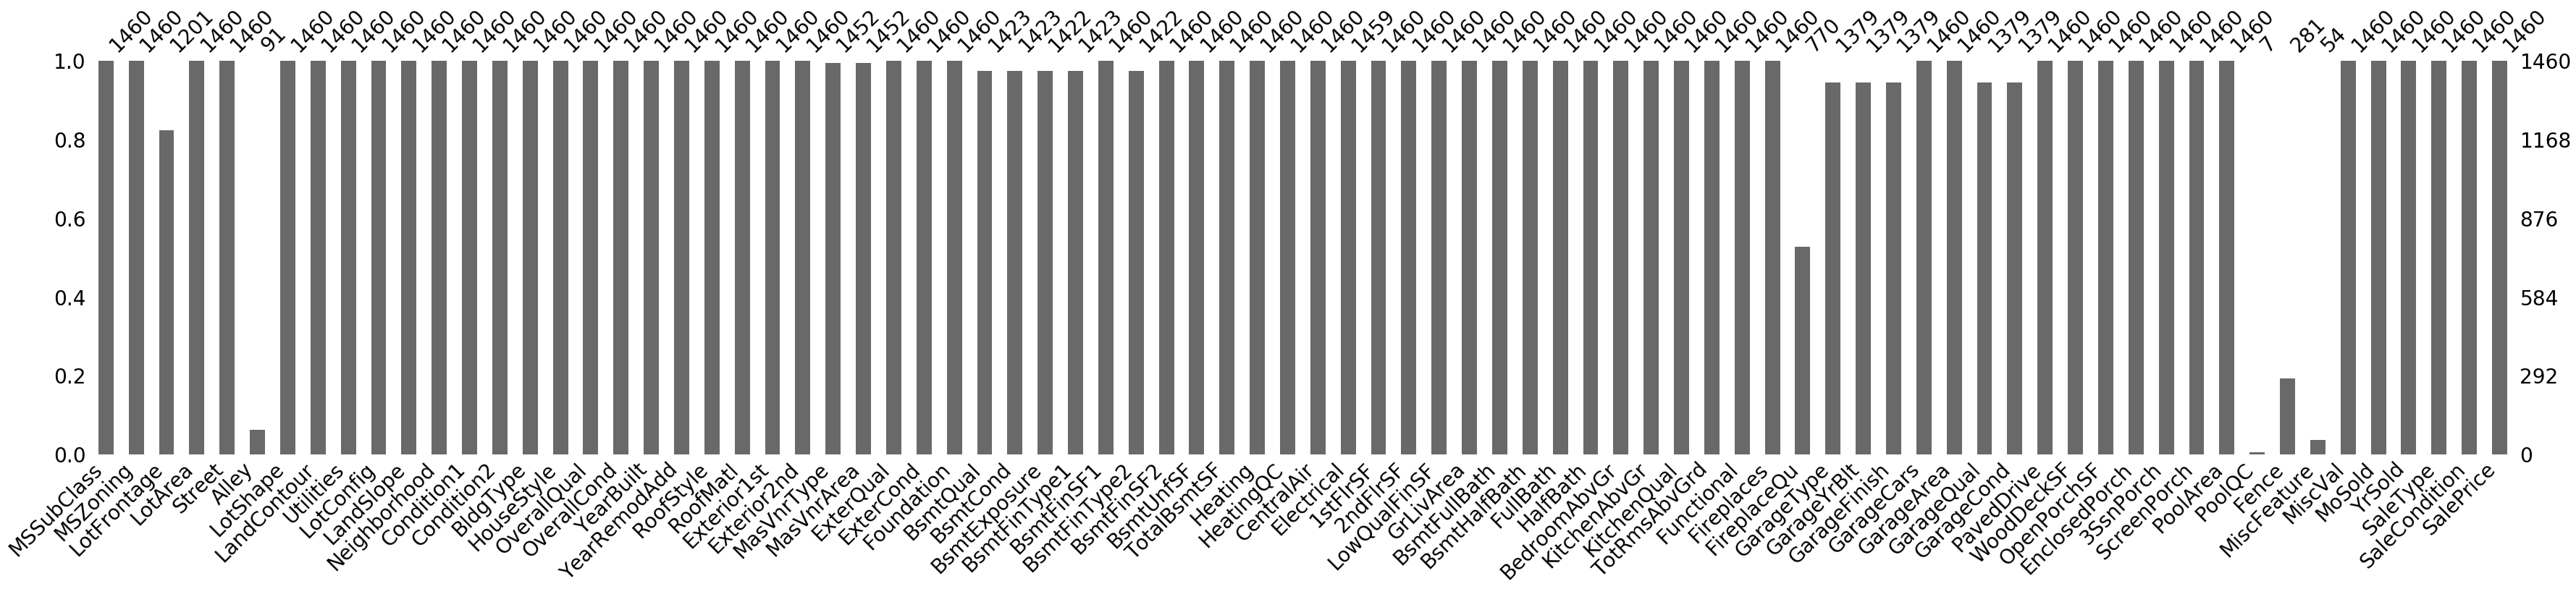

In [12]:
msno.bar(df_train,figsize=(60, 10),fontsize=28,labels=True)

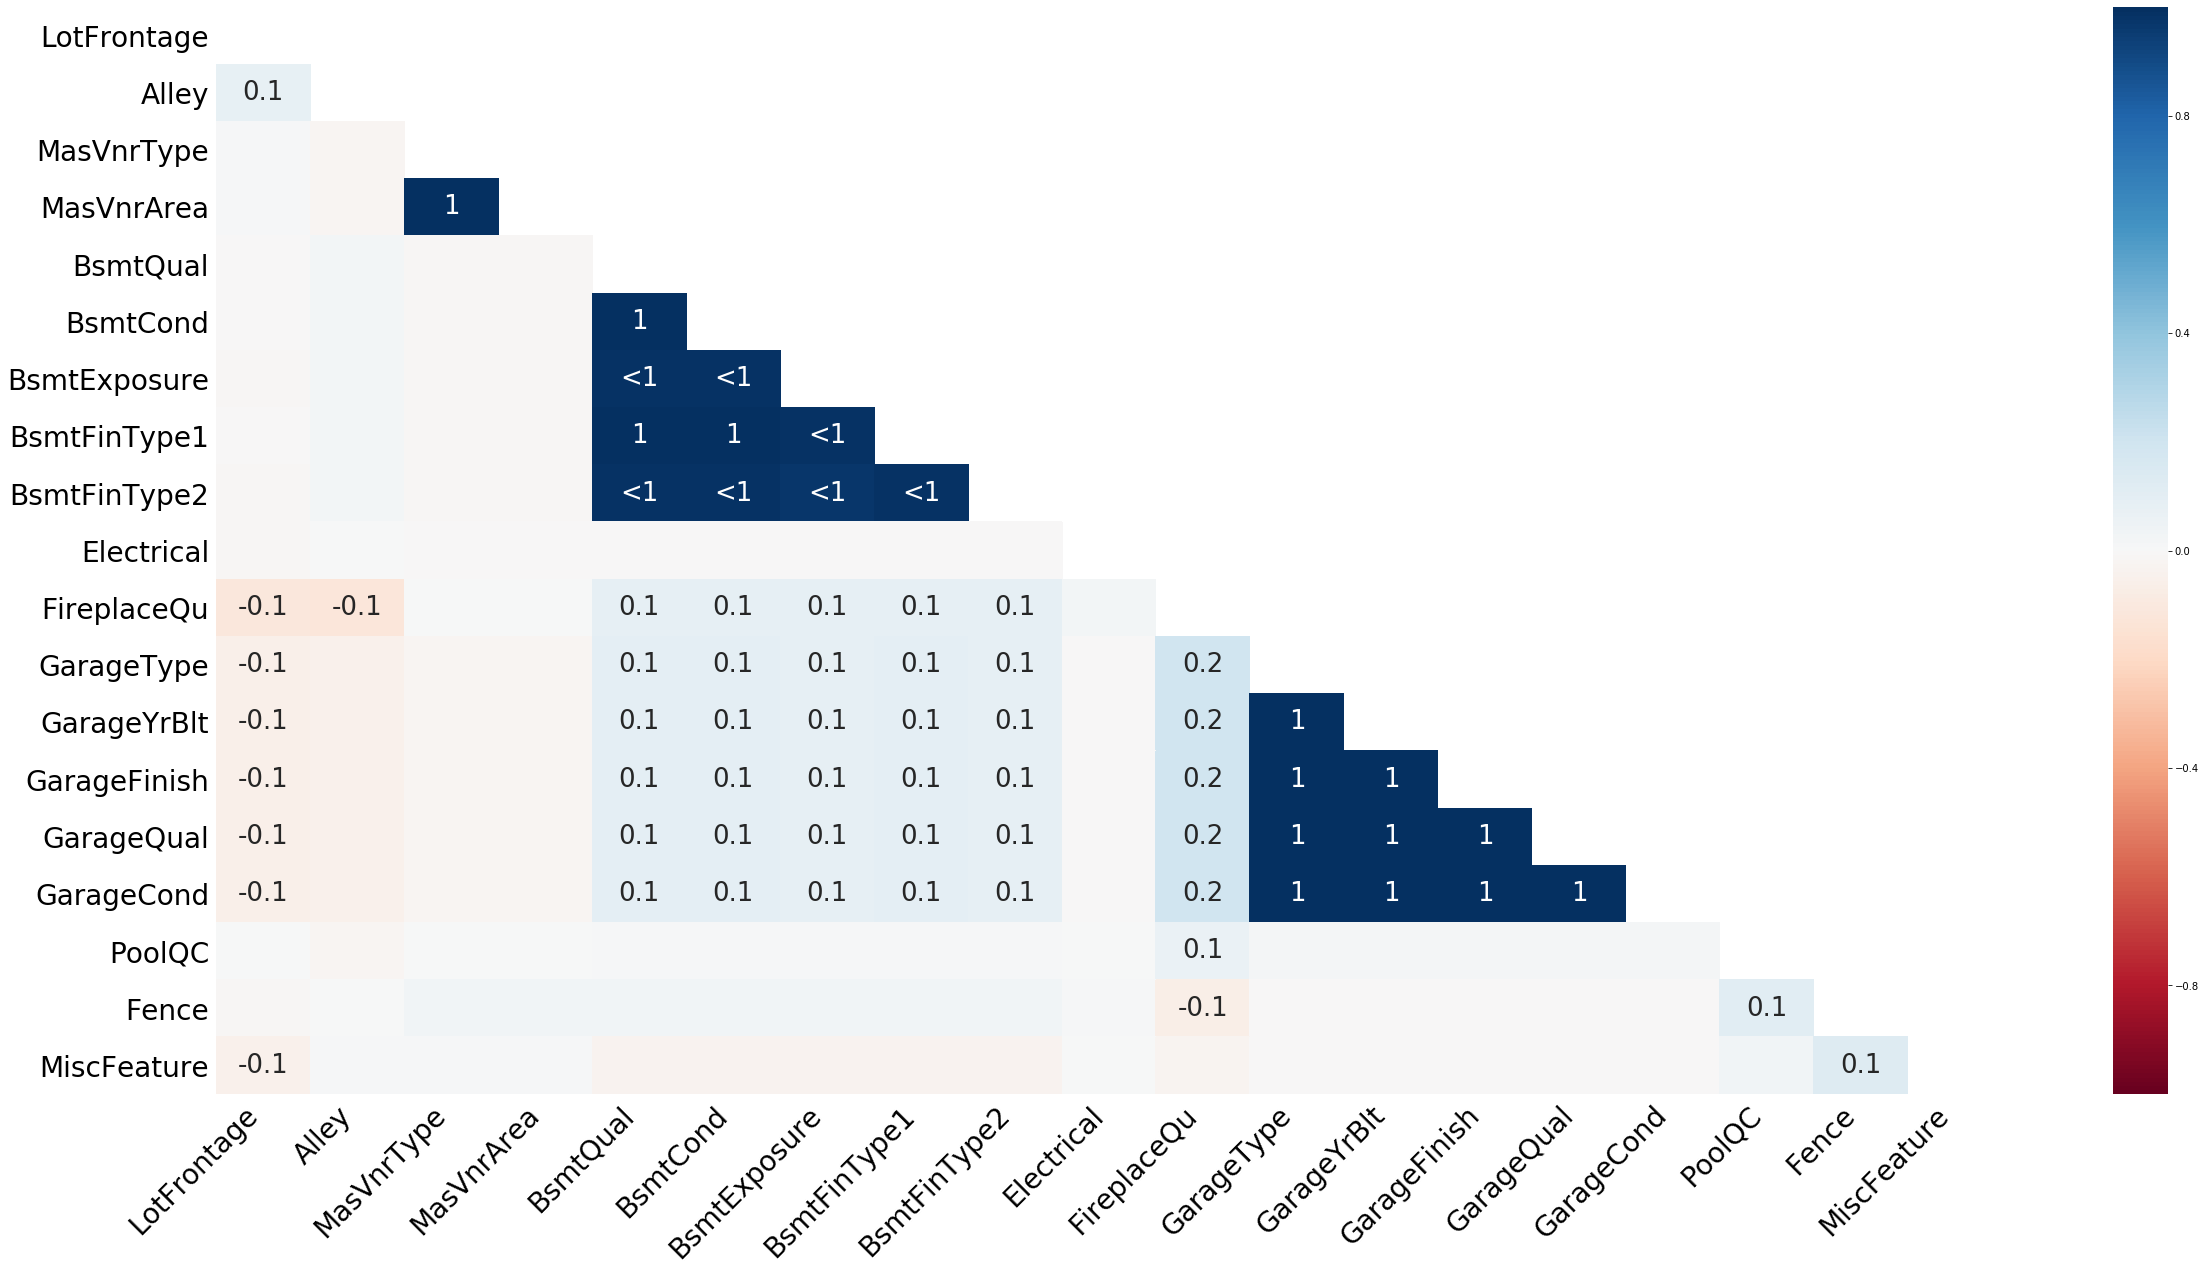

In [231]:
msno.heatmap(x_train,figsize=(40, 20),fontsize=28,labels=True)
# A value near -1 means if one variable appears then the other variable is very likely to be missing.
# A value near 0 means there is no dependence between the occurrence of missing values of two variables.
# A value near 1 means if one variable appears then the other variable is very likely to be present.

In [229]:
# df_train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'],inplace=True)
nan_count_table = (df_train.isnull().sum())
nan_count_table = nan_count_table[nan_count_table > 0].sort_values(ascending=False)
print("\nColums containig NaN: ")
print(nan_count_table)


Colums containig NaN: 
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


### First Conclusion from visualizing missingness: 
### There is correlation between missingness. Garage and Basement type variables have their respective correlated misses. Because they are correlated, it seems to mean that N/A stands for non-existent. 
### (1.) Replace Garage and Basement NA's with 0 for continuous, 'None' for categorical.
### Columns with at least over 80% missingness: Alley, PoolQC,Fence, MiscFeature
### (2.) There is 1460 observations. PoolQC only has 7 observations and they are fair to good. safe to drop. 
### (3.)Alley, Fence, MiscFeature, could have NA's because they are non-existent. Replace N/A with 'None'
### Categorical variables with few N/A: Electrical, MasVnrType 
### Continuous variables with few N/A: MasVnrArea 


### LotFrontage, it would make sense that LotFrontage is consistent with neighborhood theme. 
### LotFrontage NA's replaced by groupby(neighborhood) median

# (STEP 3.) Cateogorizing Nominal, Ordinal categories and continuous quantities#

In [15]:
df_train.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,10.471950
74,20,RL,85.0,10200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1954,2003,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,104.0,TA,TA,CBlock,TA,TA,No,ALQ,320,BLQ,362,404,1086,GasA,Gd,Y,SBrkr,1086,0,0,1086,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1989.0,Unf,2,490,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,5,2010,WD,Normal,11.883799
1146,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,6,1928,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1042,1042,GasA,Ex,Y,SBrkr,1042,534,0,1576,0,0,1,0,3,1,TA,8,Typ,1,Gd,Detchd,1928.0,Unf,1,225,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Family,11.911702
273,60,RL,92.0,11764,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1999,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,348.0,Gd,TA,PConc,Gd,TA,No,GLQ,524,Unf,0,628,1152,GasA,Ex,Y,SBrkr,1164,1106,0,2270,0,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1999.0,Fin,3,671,TA,TA,Y,132,57,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,12.577636
1206,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,7,1990,1991,Hip,CompShg,HdBoard,HdBoard,BrkFace,234.0,Gd,TA,CBlock,Gd,TA,Mn,ALQ,485,BLQ,177,1496,2158,GasA,Gd,Y,SBrkr,2196,0,0,2196,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1990.0,RFn,3,701,TA,TA,Y,84,70,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,12.513190
590,40,RM,50.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Feedr,1Fam,1Story,5,6,1930,1960,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,742,742,GasA,TA,Y,FuseA,779,0,156,935,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1988.0,Unf,1,308,TA,TA,P,0,0,0,0,0,0,NaN,NaN,Shed,600,8,2008,WD,Normal,11.283512
126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,11.344507
1416,120,RL,51.0,3635,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,130.0,Gd,TA,PConc,Gd,TA,No,ALQ,988,Unf,0,398,1386,GasA,Ex,Y,SBrkr,1569,0,0,1569,0,1,2,0,1,1,Gd,7,Typ,1,TA,Attchd,2007.0,RFn,3,660,TA,TA,Y,143,20,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,12.077671
944,90,RL,100.0,25000,Pave,NaN,Reg,Low,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,1Story,5,4,1967,1967,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,1632,1632,GasA,TA,Y,SBrkr,1632,0,0,1632,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1967.0,Unf,2,576,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,11.870600


In [16]:
type(df_train.loc[:,'YrSold'][1])

numpy.int64

<Figure size 1440x2160 with 0 Axes>

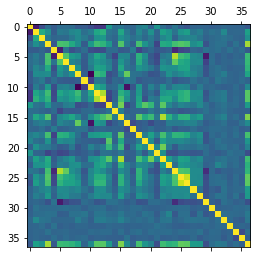

In [233]:
plt.figure(figsize=(20,30))
plt.matshow(df_train.corr())
plt.show()

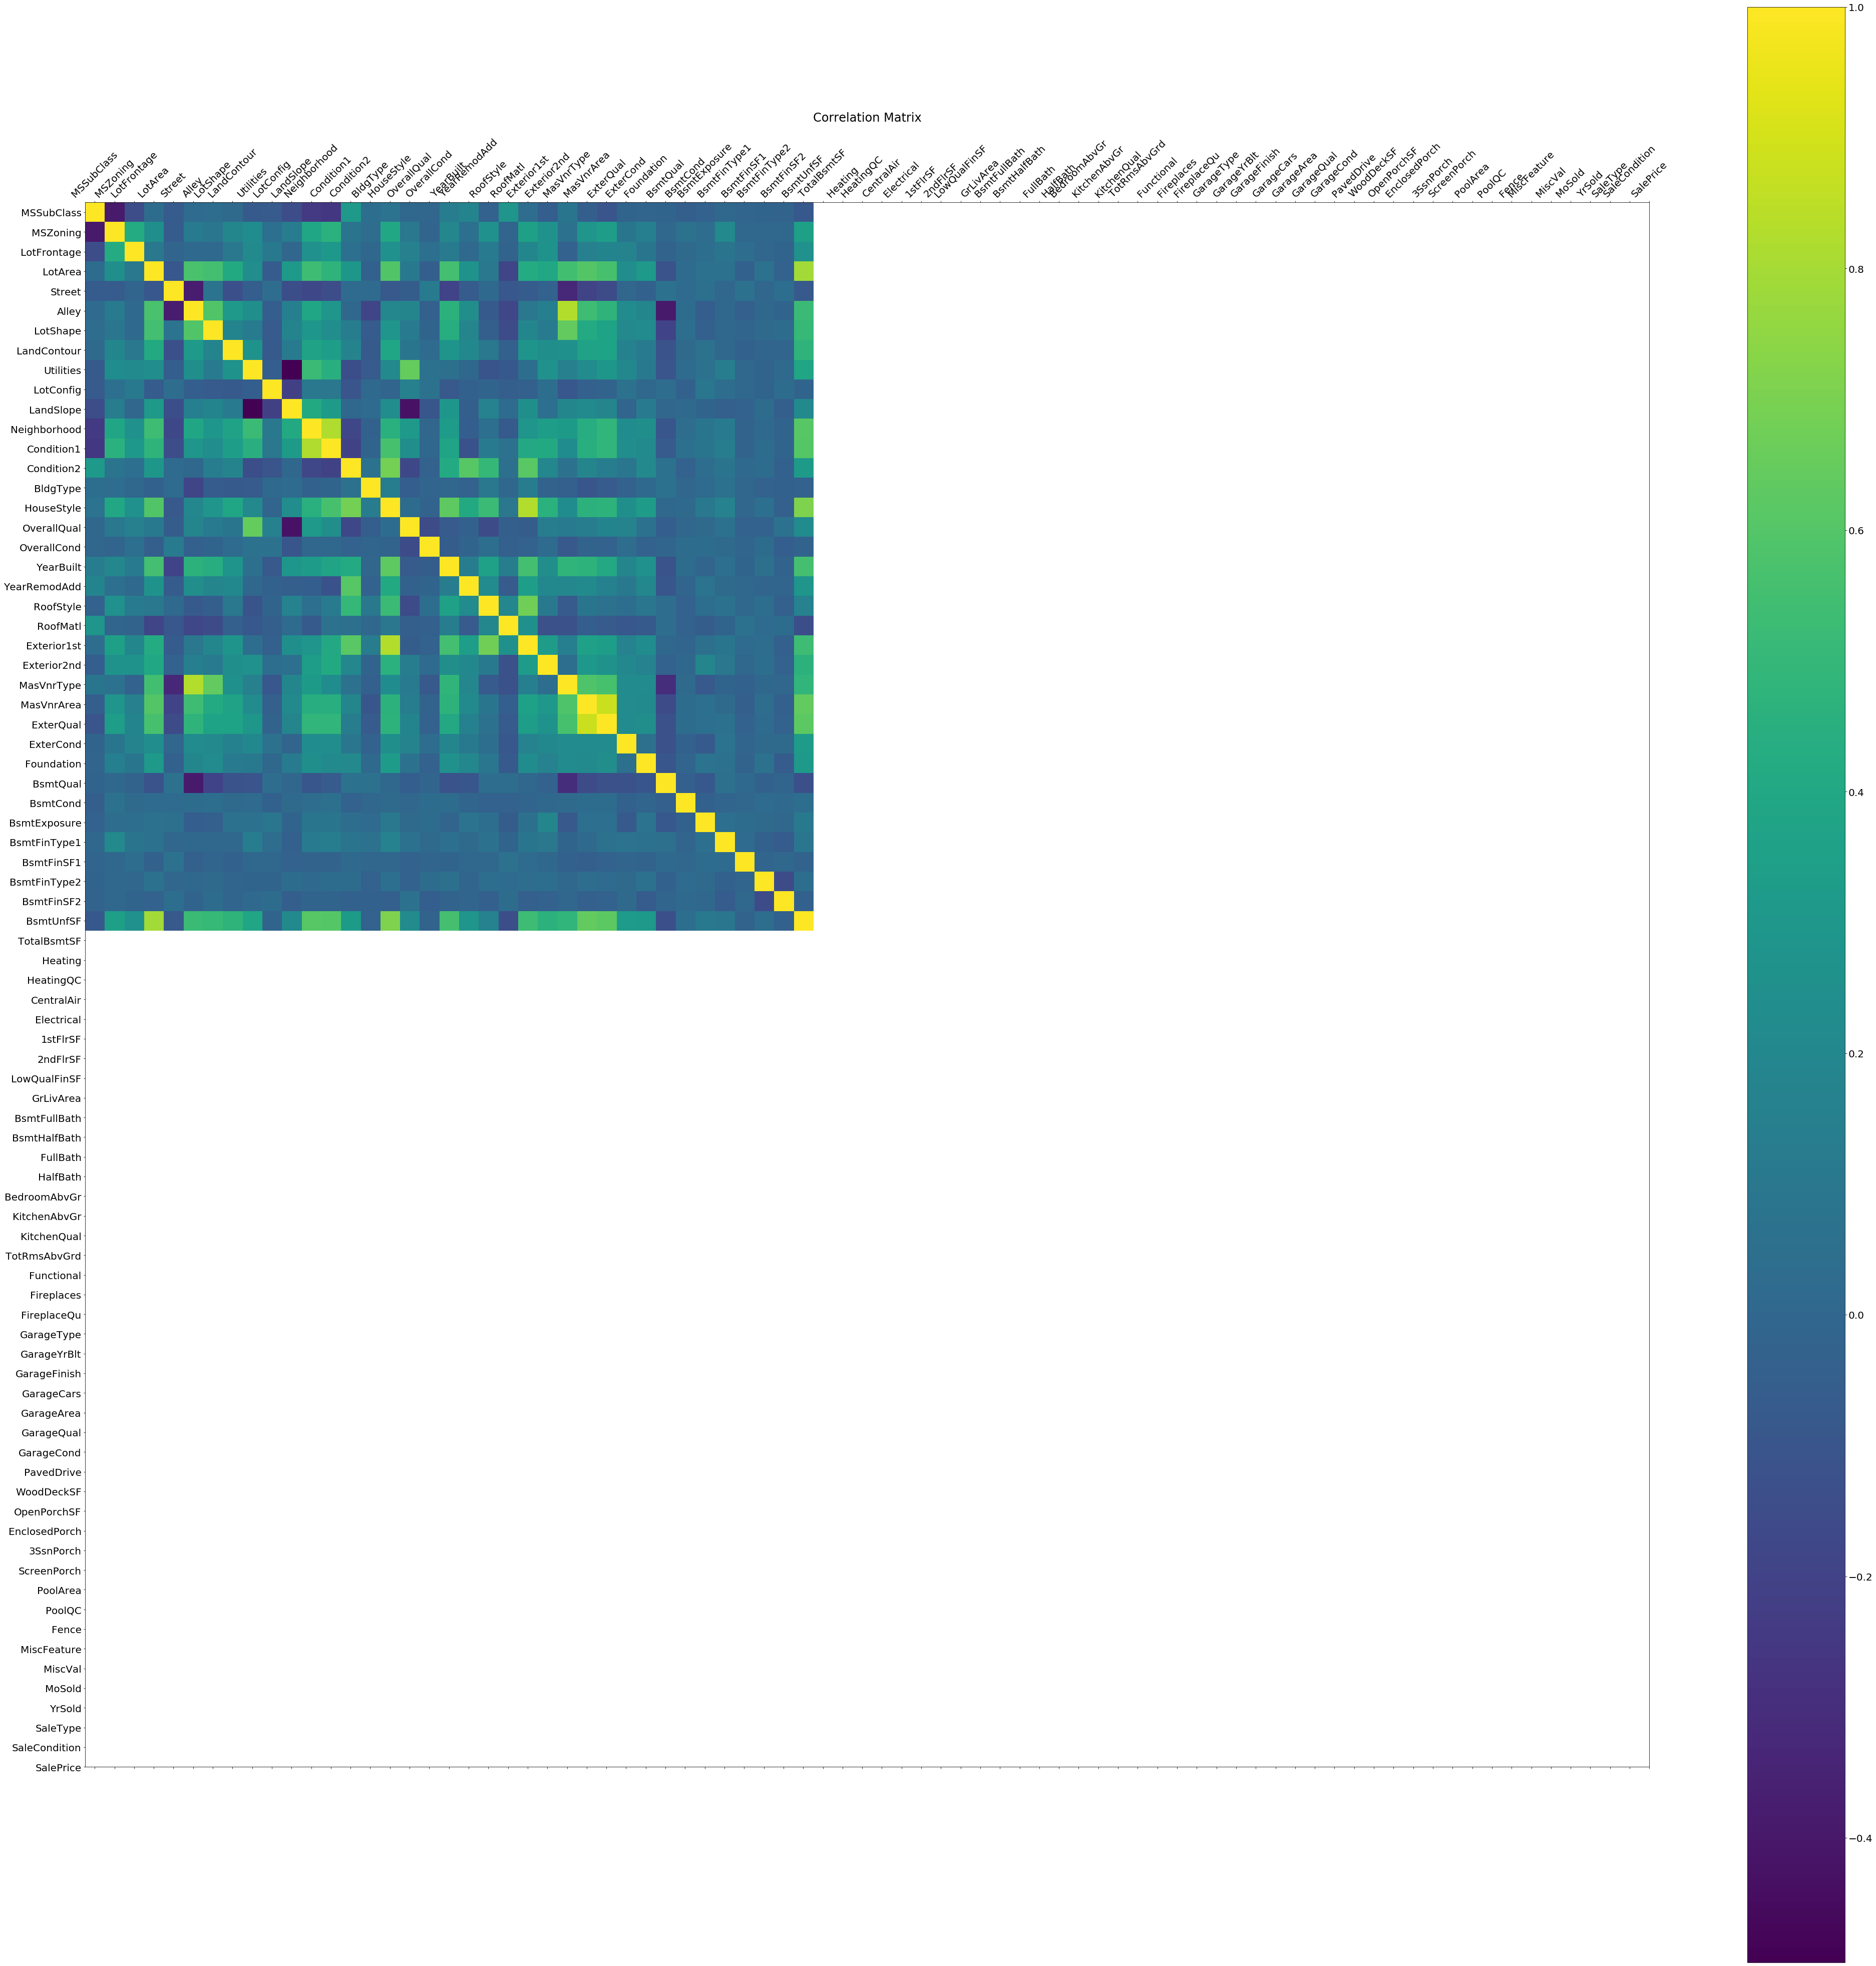

In [244]:
f = plt.figure(figsize=(70, 70))
plt.matshow(df_train.corr(), fignum=f.number)
plt.xticks(range(df_train.shape[1]), df_train.columns, fontsize=20, rotation=45)
plt.yticks(range(df_train.shape[1]), df_train.columns, fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Correlation Matrix', fontsize=24);

In [239]:
df_train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
